Utilizando a toolbox de sua preferência, realize o treinamento de uma rede neural artificial do tipo Perceptron Multicamadas para resolver um problema de classificação multiclasses. Além do conjunto de treinamento, considere um conjunto de validação para avaliação final do método. 

Descreva as características dos dados, descreva a arquitetura da rede (dimensão, número de camadas) e discuta aspectos de desempenho (forma de divisão dos dados para treinamento, validação e teste, porcentagem de classificação correta, matriz de confusão).

## Training a MLP
___

In this version I'll use train_test_split to create a confusion_matrix at the end.

In [1]:
## importing packages

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from ann_visualizer.visualize import ann_viz

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
## loading the dataset

df = pd.read_csv('../data/final/final_dataframe.csv',sep=';')

In [3]:
## inspecting the dataset

df.head()

,volatile_acid_types_high,volatile_acid_types_highest,volatile_acid_types_low,volatile_acid_types_lowest,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,rest_of_sulfur,target
0,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,0
1,0.0,1.0,0.0,0.0,0.731515,2.325972,-5.199338,-0.114415,1.593219,-0.207223,-0.791884,0.613509,-0.041413,1.111702,-0.360172,-0.833781,0
2,0.0,1.0,0.0,0.0,0.731515,1.976943,-1.684464,-0.265284,1.428482,-0.803958,-0.922330,0.680013,0.322932,0.963423,-0.360172,-0.862544,0
3,0.0,0.0,1.0,0.0,2.074445,-0.110627,1.644369,-0.593940,0.903301,-0.667419,-0.864365,1.081940,-0.307111,0.529301,-0.360172,-0.821412,1
4,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,0


In [4]:
## defining X and y
X = df.drop('target',axis=1).values
y = df.target.values

## defining train and test
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## categorizing the target feature
y_train_cat = to_categorical(y_train,num_classes=3)
y_test_cat = to_categorical(y_test,num_classes=3)

In [5]:
## defining the number of epochs
NUM_EPOCHS = 20

## defining the model
model = Sequential()
## adding layers with some regularization to prevent overfitting
model.add(Dense(8,activation='relu',input_shape=(16,),kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(8,activation='relu',input_shape=(8,)))
model.add(Dense(8,activation='relu',input_shape=(8,),kernel_regularizer=regularizers.l2(0.1)))
## last layer
model.add(Dense(3,activation='softmax'))
## compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
## fiting the model
fitted = model.fit(x_train , y_train_cat , epochs=NUM_EPOCHS , batch_size=32 , verbose=0 , validation_data = (x_test,y_test_cat) , workers=4)

In [7]:
## checking the type of the model, for documentation searches purposes
type(fitted)

keras.callbacks.callbacks.History

In [41]:
model.predict([[list(x_test[0])]])

array([[0.07470815, 0.4768917 , 0.4484001 ]], dtype=float32)

In [42]:
model.predict_classes([[list(x_test[0])]])

array([1])

In [55]:
x_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.2406714 ,
        0.60746322,  0.10810309, -0.74469445,  0.67527746,  0.2887499 ,
       -0.86436505,  0.73263792,  1.44968225,  1.57561258, -0.28482819,
       -1.04440879])

In [56]:
y_train[0]

0

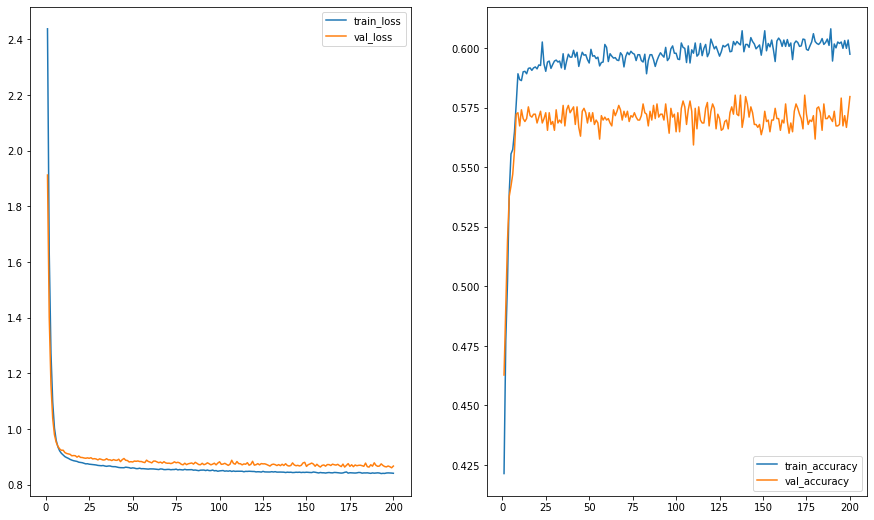

In [8]:
## plotting the loss and accuracy curves

f, axs = plt.subplots(1,2,figsize=(15,9))

axs[0].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['loss'],label='train_loss')
axs[0].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['val_loss'],label='val_loss')
axs[0].legend()

axs[1].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['accuracy'],label='train_accuracy')
axs[1].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['val_accuracy'],label='val_accuracy')
axs[1].legend()

plt.show()

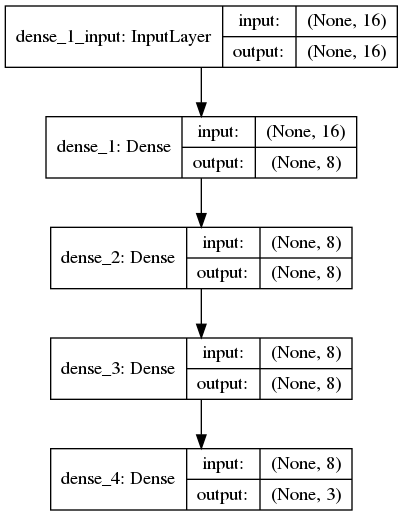

In [59]:
## plotting the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
## getting the confusion matrix
print(classification_report(y_test,model.predict_classes(x_test,verbose=0),target_names=['low_quality','medium_quality','high_quality']))

                precision    recall  f1-score   support

   low_quality       0.62      0.65      0.64       584
medium_quality       0.54      0.60      0.57       738
  high_quality       0.59      0.39      0.47       303

      accuracy                           0.58      1625
     macro avg       0.59      0.55      0.56      1625
  weighted avg       0.58      0.58      0.58      1625



In [12]:
## creating the model viz
ann_viz(model, title="")